In [1]:
%matplotlib widget

import sys
import os
from pathlib import Path

SCRIPT_DIR = Path(os.getcwd()).parent
sys.path.append(os.path.dirname(SCRIPT_DIR))

In [2]:
import matplotlib.pyplot as plt

from python.fluorophores import FlMoveBleach
from python.simulators import SimSequencefile

In [3]:
sim = SimSequencefile()

In [4]:
fname = os.path.join(SCRIPT_DIR, "examples", "Tracking_2D.json")
fname2 = os.path.join(SCRIPT_DIR, "settings", "PSFvectorial2D.json") # use a PSF that is defined via a json file
sim.loadsequence(fname, fname2)
sim.makepatterns()

pinhole94900, flat0, vortex0, 

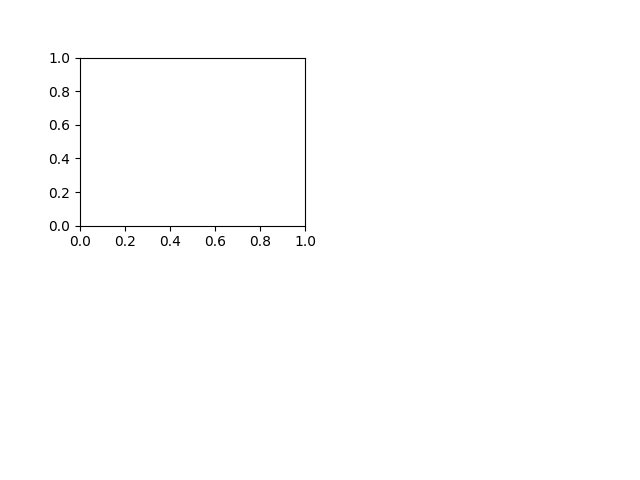

In [5]:
## make diffusing, bleaching fluorophores
fig = plt.figure()
ax = fig.add_subplot(221)

sim.posgalvo = [0, 0, 0]
sim.posEOD = [0, 0, 0]
sim.time = 0
sim.background = 0
fl = FlMoveBleach()
fl.photonbudget = 100000
updatetime = 0.01  # ms
D = 0.5  # um^2/s
fl.makediffusion(D, updatetime)
# diffusion coefficient, update time args.startpos,dim, numpoints, buondarybox
sim.fluorophores = fl


In [ ]:
import cProfile, pstats, io
from pstats import SortKey
pr = cProfile.Profile()
pr.enable()
out = sim.runSequence(repetitions=1)
pr.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         198898 function calls in 0.206 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.206    0.103 /Users/zachcm/miniforge3/envs/expansion/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3541(run_code)
        2    0.000    0.000    0.206    0.103 {built-in method builtins.exec}
        1    0.000    0.000    0.206    0.206 /var/folders/kd/wrptvww96j9_ltf5ds0590ww0000gn/T/ipykernel_96578/4126470633.py:1(<module>)
        1    0.000    0.000    0.206    0.206 /Users/zachcm/Code/SimulFLUX/python/simulators/sim_sequencefile.py:311(runSequence)
        1    0.009    0.009    0.206    0.206 /Users/zachcm/Code/SimulFLUX/python/simulators/sim_sequencefile.py:105(runSequenceintern)
      282    0.032    0.000    0.184    0.001 /Users/zachcm/Code/SimulFLUX/python/simulators/simulator.py:226(patternscan)
     1693    0.007    0.000    0.119    0.000 /Users/zachcm/Code/SimulFLUX/pytho

/Users/zachcm/Code/SimulFLUX/python/simulators/sim_sequencefile.py:230: RuntimeWarning: divide by zero encountered in divide
  loc.efo=loc.eco/(np.sum(scanout.par.pattern.pointdwelltime[:-1]))
/Users/zachcm/Code/SimulFLUX/python/simulators/sim_sequencefile.py:230: RuntimeWarning: invalid value encountered in divide
  loc.efo=loc.eco/(np.sum(scanout.par.pattern.pointdwelltime[:-1]))


In [7]:
sim.plotpositions(out, xvalues="time")